In [ ]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pro2.csv to pro2.csv


In [ ]:
mobile_tweets= pd.read_csv('pro2.csv')

In [ ]:
mobile_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unique_ID       10000 non-null  int64 
 1   Phone_Name      10000 non-null  object
 2   Reviews         10000 non-null  object
 3   Rating          10000 non-null  object
 4   Star_Rating     10000 non-null  int64 
 5   Recommendation  10000 non-null  object
dtypes: int64(2), object(4)
memory usage: 468.9+ KB


In [ ]:
mobile_tweets.head()

,Unique_ID,Phone_Name,Reviews,Rating,Star_Rating,Recommendation
0,32298,vivo y20a,I feel so LUCKY to have found this used (phone...,Positive,5,Yes
1,26341,vivo y20a,"nice phone, nice up grade from my pantach revu...",Positive,4,Yes
2,25330,vivo y20a,Very pleased,Positive,5,Yes
3,13524,vivo y20a,It works good but it goes slow sometimes but i...,Positive,4,Yes
4,47221,vivo y20a,Great phone to replace my lost phone. The only...,Positive,4,Yes


In [ ]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size

6.0
4.0


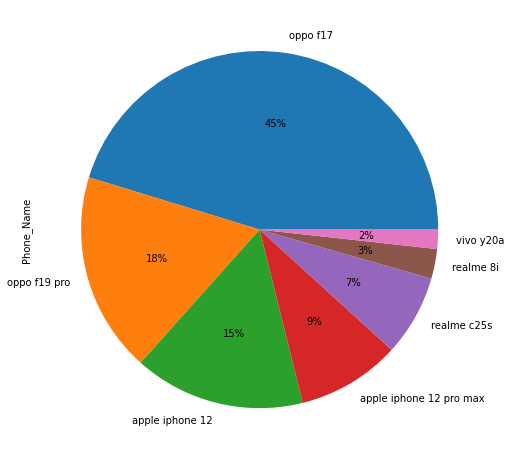

In [ ]:
mobile_tweets.Phone_Name	.value_counts().plot(kind='pie', autopct='%1.0f%%')

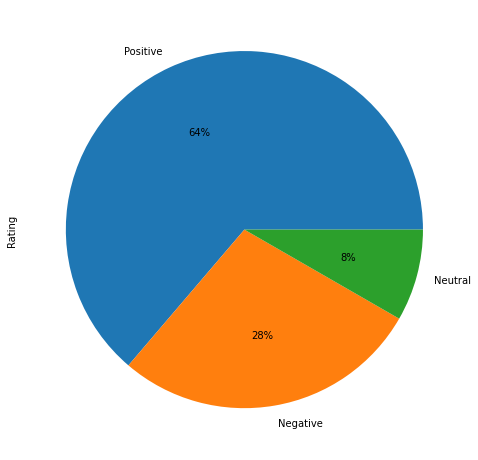

In [ ]:
mobile_tweets.Rating.value_counts().plot(kind='pie', autopct='%1.0f%%')

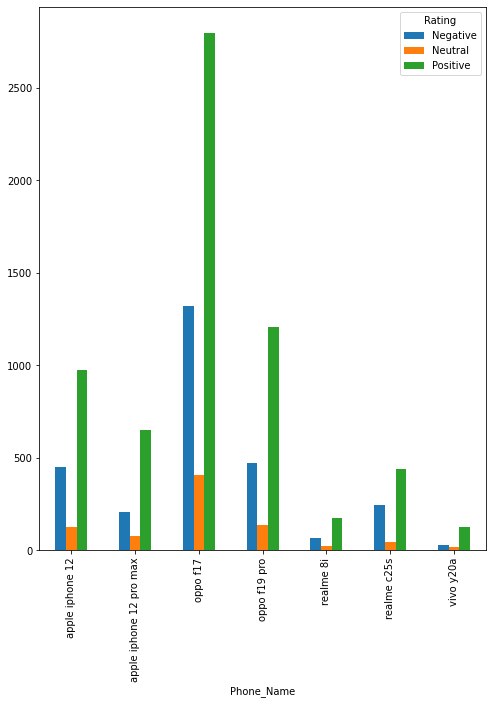

In [ ]:
Rating = mobile_tweets.groupby(['Phone_Name', 'Rating']).Rating.count().unstack()
Rating.plot(kind='bar')

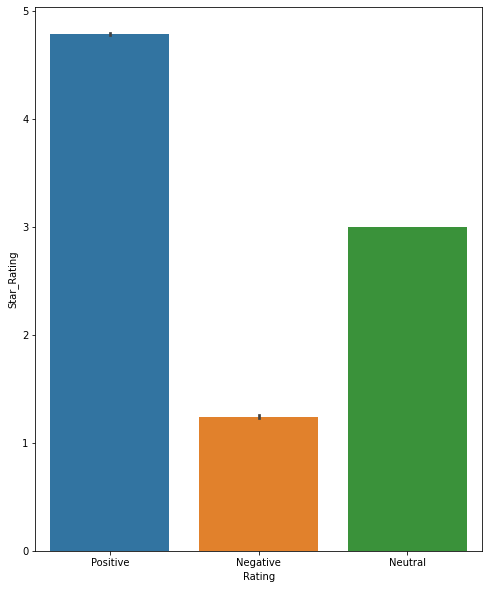

In [ ]:
import seaborn as sns
sns.barplot(x='Rating', y='Star_Rating' , data=mobile_tweets)

In [ ]:
mobile_tweets.groupby('Rating').describe()

Unique_ID                                                       \
             count          mean           std   min       25%      50%   
Rating                                                                    
Negative    2794.0  23759.877237  13490.264483  42.0  12854.75  23000.0   
Neutral      831.0  24238.953069  13752.692648  21.0  13469.50  23438.0   
Positive    6375.0  24084.024157  13533.765423  23.0  13265.50  23545.0   

                           Star_Rating                                     \
              75%      max       count      mean       std  min  25%  50%   
Rating                                                                      
Negative  33927.5  51273.0      2794.0  1.242305  0.428555  1.0  1.0  1.0   
Neutral   34804.5  51072.0       831.0  3.000000  0.000000  3.0  3.0  3.0   
Positive  34149.0  51284.0      6375.0  4.783373  0.411979  4.0  5.0  5.0   

                    
          75%  max  
Rating              
Negative  1.0  2.0  
Neutral   3.0  3.0  
Positive  5.0  5.0

In [ ]:
features = mobile_tweets.iloc[:, 2].values
labels = mobile_tweets.iloc[:, 3].values

In [ ]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)
processed_features

['i feel so lucky to have found this used phone to us not used hard at all phone on line from someone who upgraded and sold this one my son liked his old one that finally fell apart after 2 5 years and didn want an upgrade thank you seller we really appreciate it your honesty re said used phone recommend this seller very highly would but from them again ',
 'nice phone nice up grade from my pantach revue very clean set up and easy set up never had an android phone but they are fantastic to say the least perfect size for surfing and social media great phone samsung',
 'very pleased',
 'it works good but it goes slow sometimes but its very good phone love it',
 'great phone to replace my lost phone the only thing is the volume up button does not work but can still go into settings to adjust other than that it does the job until am eligible to upgrade my phone again thaanks ',
 'i already had phone with problems know it stated it was used but dang it did not state that it did not charge w

In [ ]:



















import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 2500) (2000, 2500) (8000,) (2000,)


In [ ]:
import time
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
t0=time.time()
text_classifier.fit(X_train, y_train)
t1=time.time()

In [ ]:
predictions = text_classifier.predict(X_test)
t2=time.time()
train=t1-t0
test=t2-t1

In [ ]:
print("Traing time: %fs; Prediction time: %fs"%(train,test))

Traing time: 23.617852s; Prediction time: 0.287235s


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, classification_report
matrix=confusion_matrix(y_test,predictions)
print(confusion_matrix(y_test,predictions))

[[ 476    2   65]
 [  37   67   65]
 [  30    4 1254]]


Text(24.0, 0.5, 'Truth')

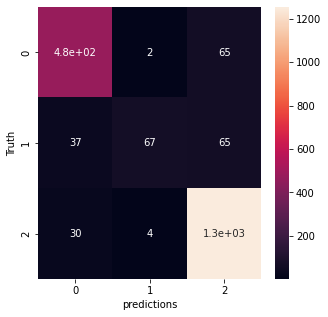

In [ ]:
import seaborn as sn
plt.figure(figsize=(5,5))
sn.heatmap(matrix, annot= True)
plt.xlabel('predictions')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

    Negative       0.88      0.88      0.88       543
     Neutral       0.92      0.40      0.55       169
    Positive       0.91      0.97      0.94      1288

    accuracy                           0.90      2000
   macro avg       0.90      0.75      0.79      2000
weighted avg       0.90      0.90      0.89      2000



In [ ]:
print(f"The accuracy of the model is {round(accuracy_score(y_test,predictions),3)*100} %")

The accuracy of the model is 89.8 %
